In [1]:
if (!require(tidyverse)) {
    install.packages('tidyverse')
}
# install.packages('psych')
# install.packages('dplyr')
# install.packages('QuantPsyc')
# install.packages('ggpubr')
# install.packages('dplyr')
# install.packages('heplots')
# install.packages('ggplot2')

# library(psych)
# #library(dplyr)
# library(QuantPsyc)
# library(ggpubr)
# # library(dplyr)
# library(heplots)
library(ggplot2)

Loading required package: tidyverse
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
data <- read.csv('data/formatted_data.csv')

In [3]:
head(data)

country,sex,age,marriage_duration,n_children,n_broughtup_children,education,material_status,religion,religiousity,pension,mrq,kansas,age_at_marriage
<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>
Brazil,male,21,2,0,0,5,3,1,4,4,1.222222,7.000000,19
Brazil,male,29,3,1,0,5,3,1,6,5,1.111111,6.000000,26
Brazil,male,30,7,0,0,5,3,1,4,4,1.333333,7.000000,23
Brazil,male,30,7,1,1,5,3,1,6,7,1.222222,6.000000,23
Brazil,male,28,9,0,0,4,2,1,5,7,1.222222,6.666667,19
Brazil,male,39,9,1,0,5,3,1,6,4,1.111111,5.666667,30


## Comparing for overall

In [4]:
lm_mrq <- lm(mrq ~ age_at_marriage, data=data)
qlm_mrq <- lm(mrq ~ poly(age_at_marriage, 2, raw=TRUE), data=data)
lm_kansas <- lm(kansas ~ age_at_marriage, data=data)
qlm_kansas <- lm(kansas ~ poly(age_at_marriage, 2, raw=TRUE), data=data)

In [5]:
# lm.beta(lm1)



Call:
lm(formula = mrq ~ age_at_marriage, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.5708 -0.4837 -0.2615  0.2638  3.5390 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      1.608693   0.035027  45.927  < 2e-16 ***
age_at_marriage -0.003787   0.001321  -2.867  0.00415 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.633 on 7176 degrees of freedom
Multiple R-squared:  0.001144,	Adjusted R-squared:  0.001005 
F-statistic: 8.221 on 1 and 7176 DF,  p-value: 0.004152


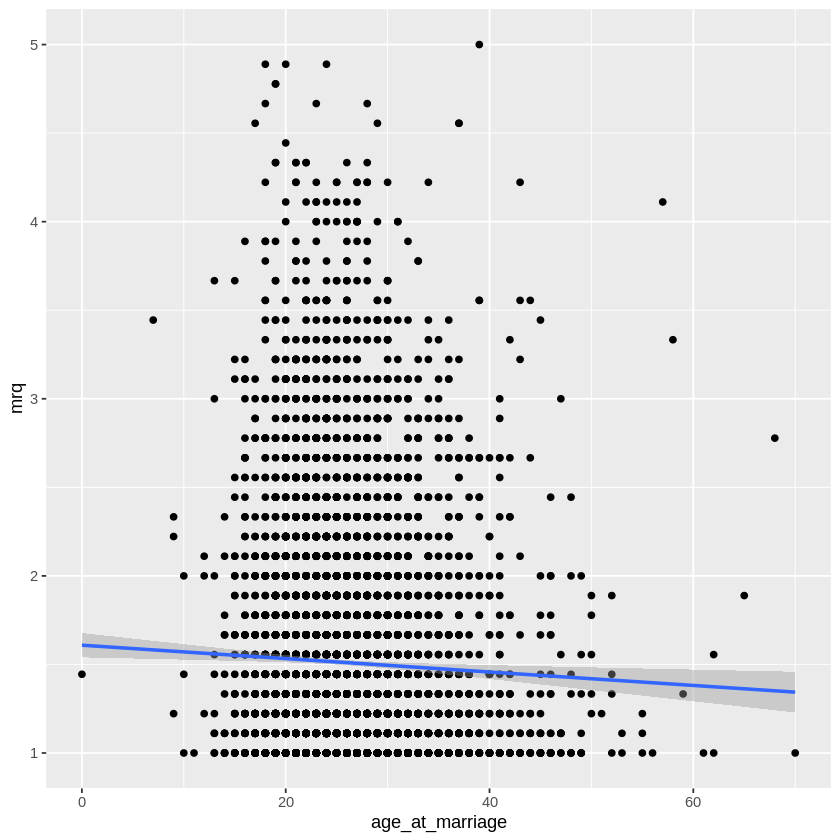

In [6]:
summary(lm_mrq)
ggplot(data=data, aes(x=age_at_marriage, y=mrq)) + geom_point() + geom_smooth(method = 'lm')


Call:
lm(formula = mrq ~ poly(age_at_marriage, 2, raw = TRUE), data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.0109 -0.4735 -0.2542  0.2661  3.5199 

Coefficients:
                                        Estimate Std. Error t value Pr(>|t|)
(Intercept)                            1.9535666  0.0961125  20.326  < 2e-16
poly(age_at_marriage, 2, raw = TRUE)1 -0.0284453  0.0065350  -4.353 1.36e-05
poly(age_at_marriage, 2, raw = TRUE)2  0.0004181  0.0001085   3.853 0.000118
                                         
(Intercept)                           ***
poly(age_at_marriage, 2, raw = TRUE)1 ***
poly(age_at_marriage, 2, raw = TRUE)2 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6324 on 7175 degrees of freedom
Multiple R-squared:  0.003206,	Adjusted R-squared:  0.002929 
F-statistic: 11.54 on 2 and 7175 DF,  p-value: 9.914e-06


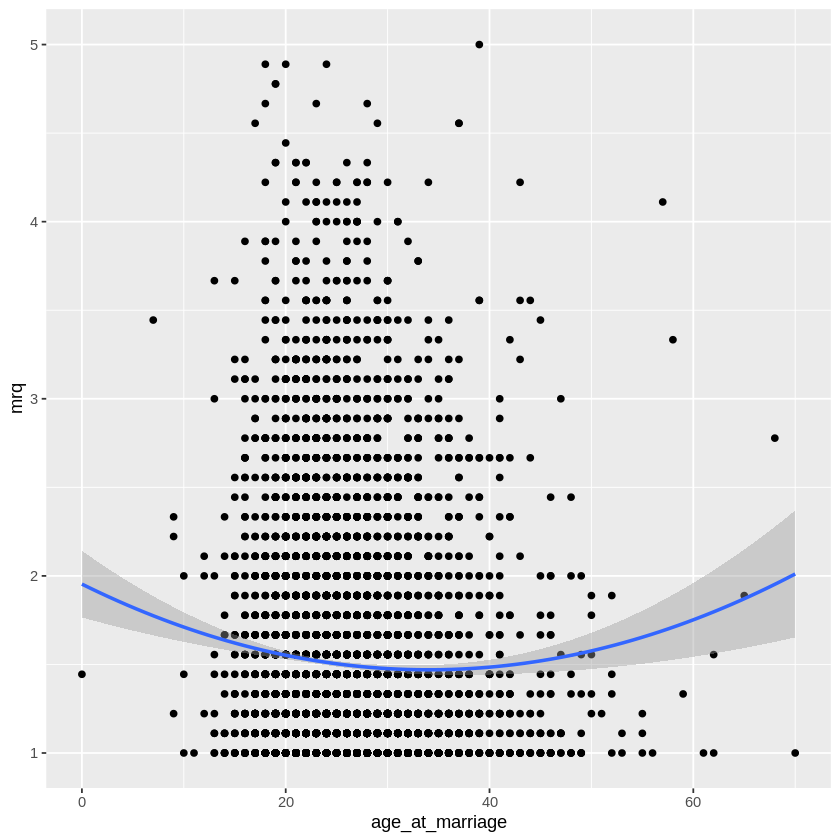

In [7]:
summary(qlm_mrq)
ggplot(data=data, aes(x=age_at_marriage, y=mrq)) + geom_point() + geom_smooth(method = 'lm', formula= y ~ poly(x, 2, raw=TRUE))


Call:
lm(formula = kansas ~ age_at_marriage, data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-4.811 -0.737  0.263  1.248  1.290 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     5.688757   0.077835  73.088   <2e-16 ***
age_at_marriage 0.002099   0.002935   0.715    0.474    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.407 on 7176 degrees of freedom
Multiple R-squared:  7.13e-05,	Adjusted R-squared:  -6.805e-05 
F-statistic: 0.5116 on 1 and 7176 DF,  p-value: 0.4744


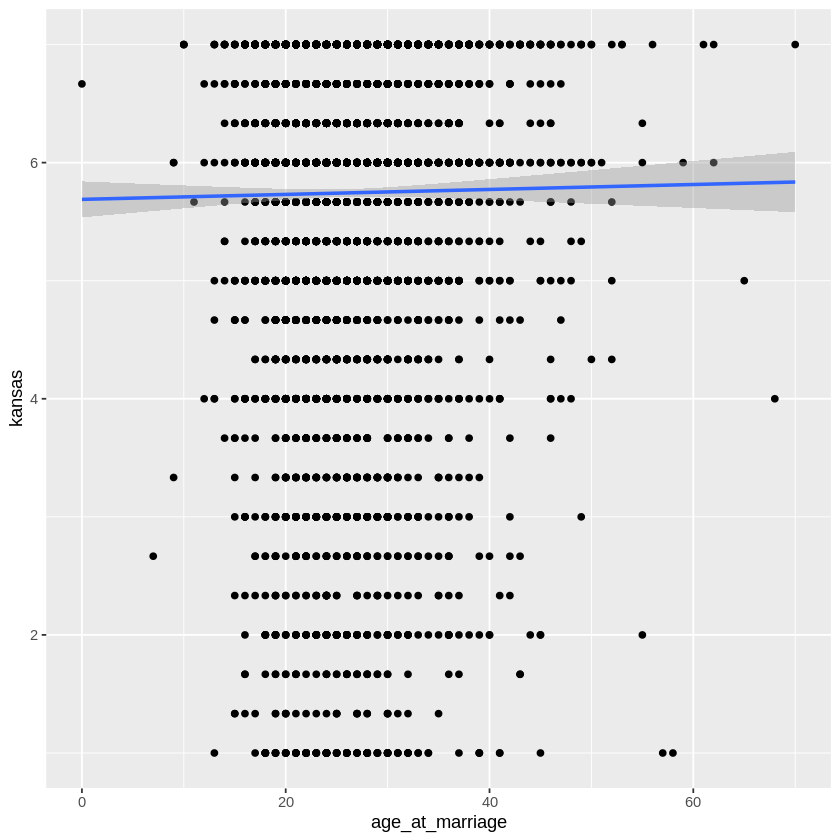

In [8]:
summary(lm_kansas)
ggplot(data=data, aes(x=age_at_marriage, y=kansas)) + geom_point() + geom_smooth(method = 'lm')


Call:
lm(formula = kansas ~ poly(age_at_marriage, 2, raw = TRUE), data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.7876 -0.7260  0.2608  1.2187  2.4291 

Coefficients:
                                        Estimate Std. Error t value Pr(>|t|)
(Intercept)                            5.0350139  0.2136358  23.568  < 2e-16
poly(age_at_marriage, 2, raw = TRUE)1  0.0488418  0.0145257   3.362 0.000777
poly(age_at_marriage, 2, raw = TRUE)2 -0.0007925  0.0002412  -3.286 0.001023
                                         
(Intercept)                           ***
poly(age_at_marriage, 2, raw = TRUE)1 ***
poly(age_at_marriage, 2, raw = TRUE)2 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.406 on 7175 degrees of freedom
Multiple R-squared:  0.001573,	Adjusted R-squared:  0.001295 
F-statistic: 5.654 on 2 and 7175 DF,  p-value: 0.00352


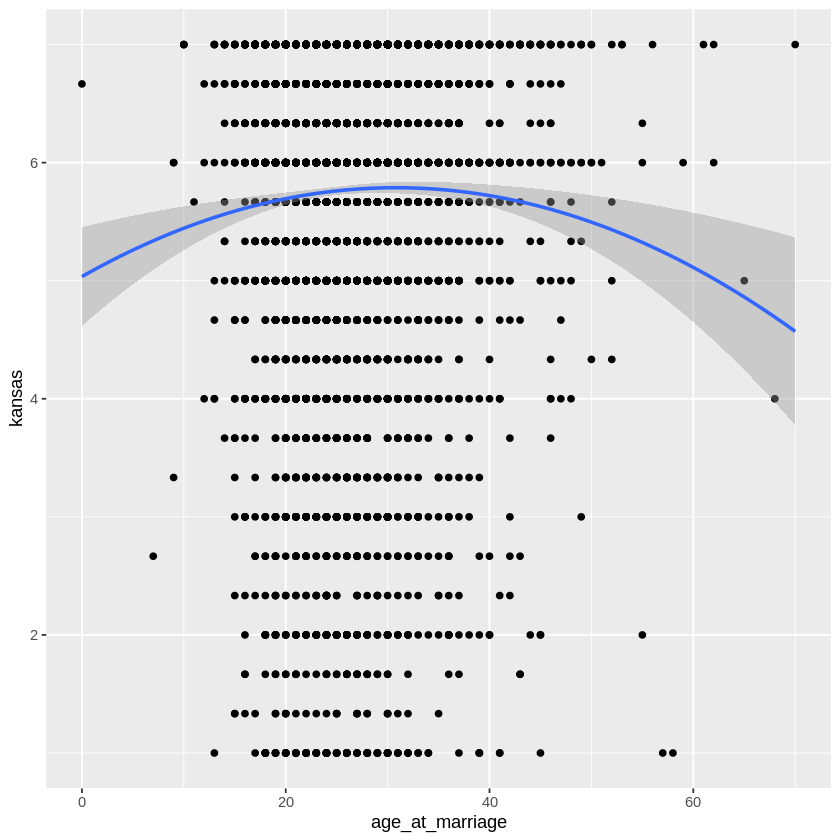

In [9]:
summary(qlm_kansas)
ggplot(data=data, aes(x=age_at_marriage, y=kansas)) + geom_point() + geom_smooth(method = 'lm', formula= y ~ poly(x, 2, raw=TRUE))

## Filter by ~ 


Call:
lm(formula = mrq ~ poly(age_at_marriage, 2, raw = TRUE), data = filtered)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.4811 -0.4714 -0.2518  0.2973  3.3093 

Coefficients:
                                        Estimate Std. Error t value Pr(>|t|)
(Intercept)                            1.421e+00  1.322e-01  10.749   <2e-16
poly(age_at_marriage, 2, raw = TRUE)1  3.457e-03  8.670e-03   0.399    0.690
poly(age_at_marriage, 2, raw = TRUE)2 -4.939e-05  1.392e-04  -0.355    0.723
                                         
(Intercept)                           ***
poly(age_at_marriage, 2, raw = TRUE)1    
poly(age_at_marriage, 2, raw = TRUE)2    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5861 on 3348 degrees of freedom
Multiple R-squared:  5.564e-05,	Adjusted R-squared:  -0.0005417 
F-statistic: 0.09315 on 2 and 3348 DF,  p-value: 0.9111


Call:
lm(formula = mrq ~ poly(age_at_marriage, 2, raw = TRUE), data = filtered)

Res

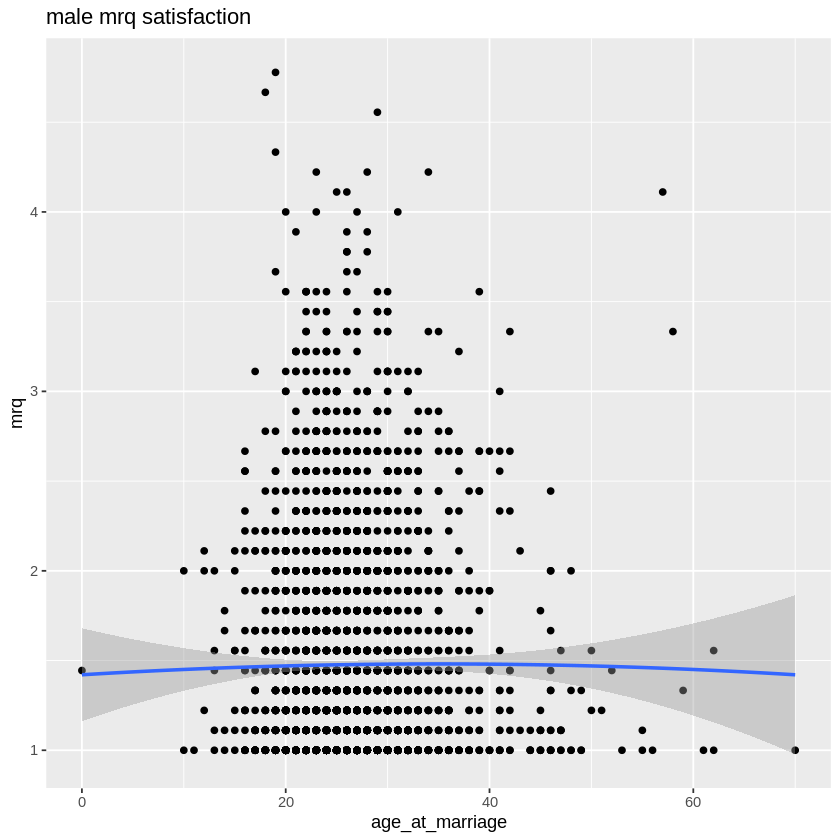

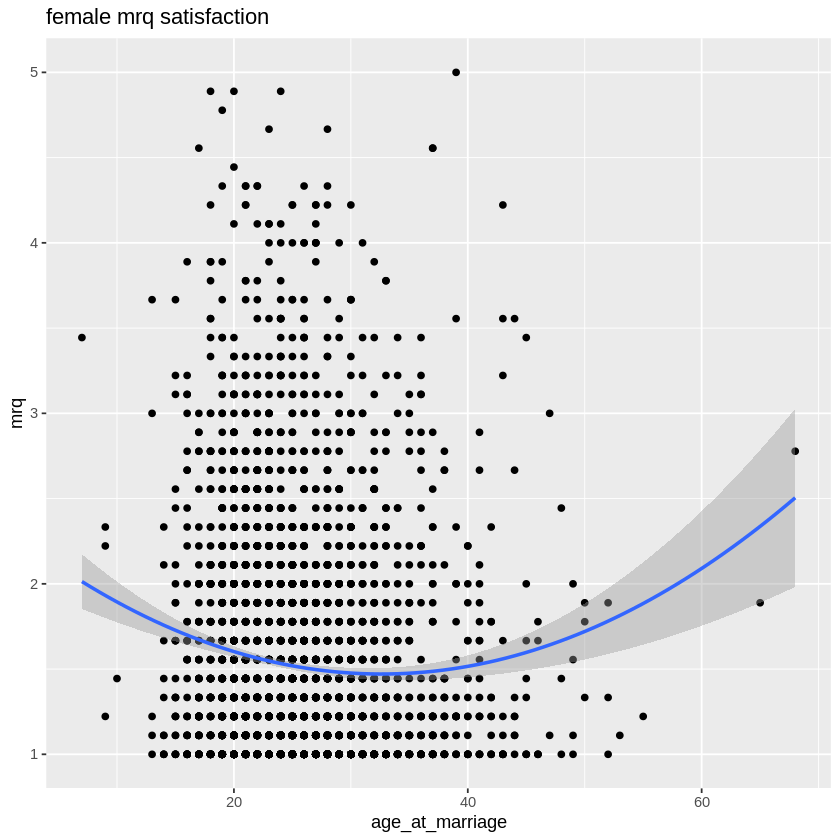

In [14]:
# mrq
col <- 'sex'
for (category in unique(data[,col])) {
    filtered <- data[data[,col] == category,]
    
    lm_filtered <- lm(mrq ~ poly(age_at_marriage, 2, raw=TRUE), data=filtered)
    print(summary(lm_filtered))
    print(ggplot(data=filtered, aes(x=age_at_marriage, y=mrq)) + 
          geom_point() + 
          geom_smooth(method = 'lm', formula= y ~ poly(x, 2, raw=TRUE)) +
          labs(title=paste(category, 'mrq satisfaction'))
         )
}


Call:
lm(formula = kansas ~ poly(age_at_marriage, 2, raw = TRUE), data = filtered)

Coefficients:
                          (Intercept)  poly(age_at_marriage, 2, raw = TRUE)1  
                            5.8675134                              0.0068971  
poly(age_at_marriage, 2, raw = TRUE)2  
                           -0.0002506  


Call:
lm(formula = kansas ~ poly(age_at_marriage, 2, raw = TRUE), data = filtered)

Coefficients:
                          (Intercept)  poly(age_at_marriage, 2, raw = TRUE)1  
                              4.65931                                0.06537  
poly(age_at_marriage, 2, raw = TRUE)2  
                             -0.00101  



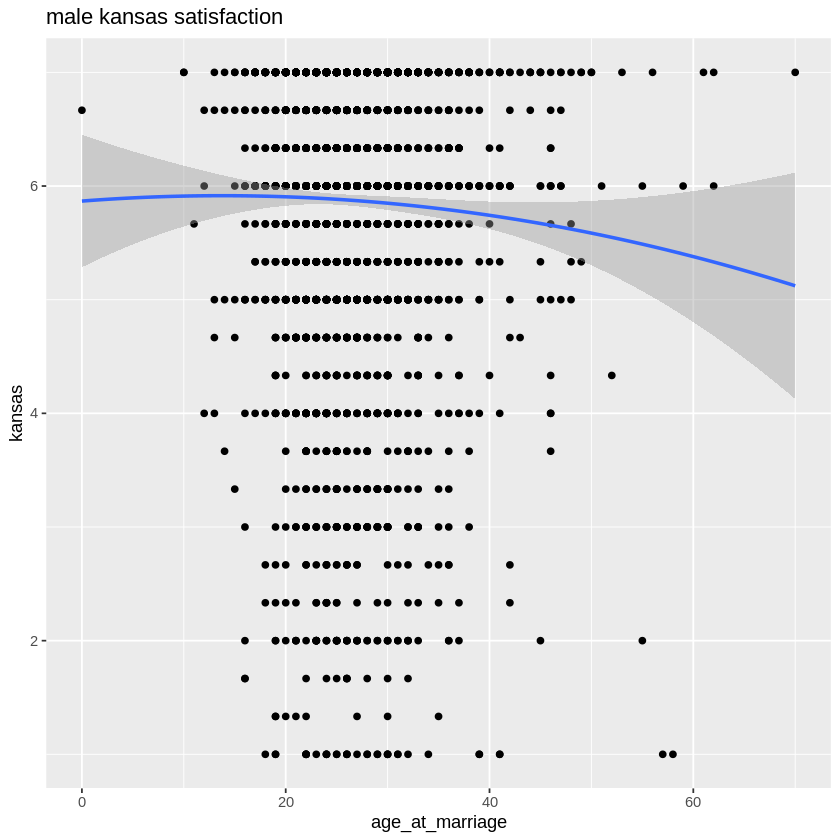

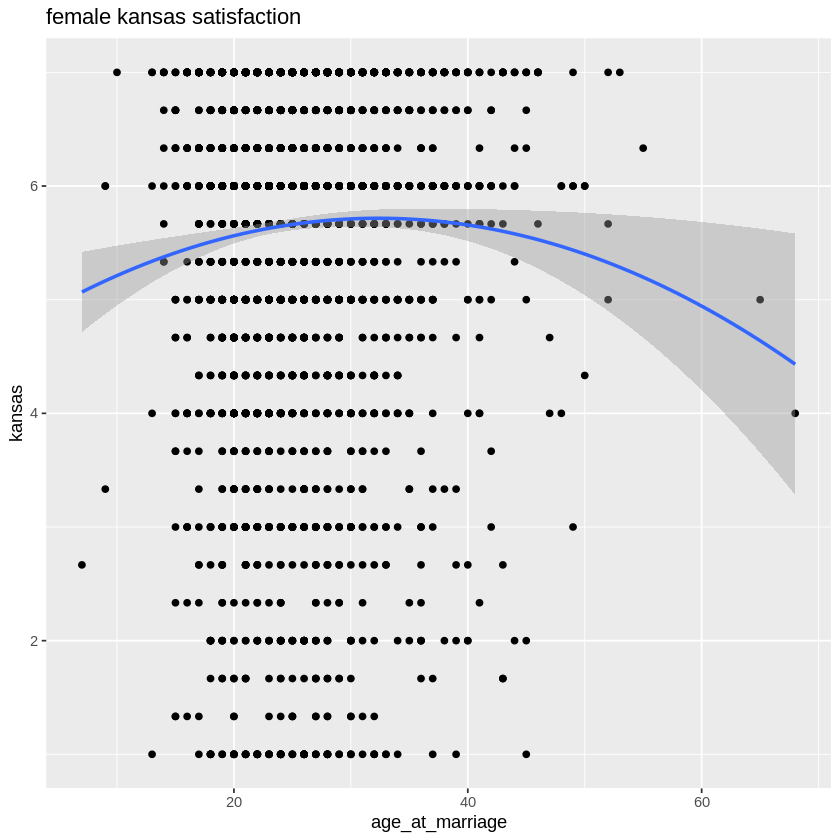

In [13]:
# kansas
col <- 'sex'
for (category in unique(data[,col])) {
    filtered <- data[data[,col] == category,]
    
    lm_filtered <- lm(kansas ~ poly(age_at_marriage, 2, raw=TRUE), data=filtered)
    
    print(lm_filtered)
    
    print(ggplot(data=filtered, aes(x=age_at_marriage, y=kansas)) + 
          geom_point() + 
          geom_smooth(method = 'lm', formula= y ~ poly(x, 2, raw=TRUE)) +
          labs(title=paste(category, 'kansas satisfaction'))
         )
}